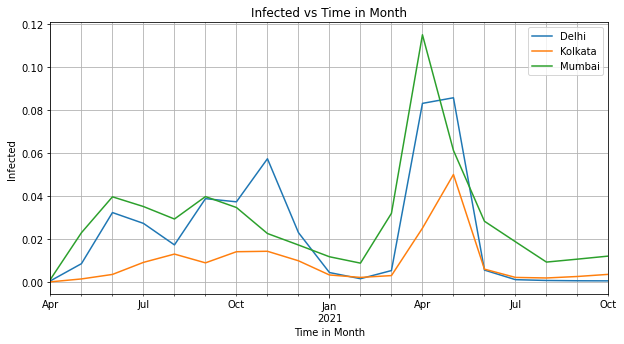

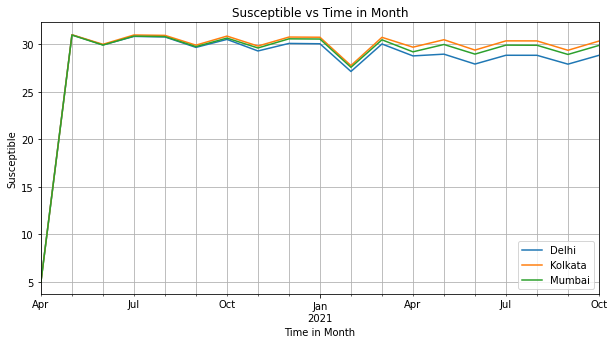

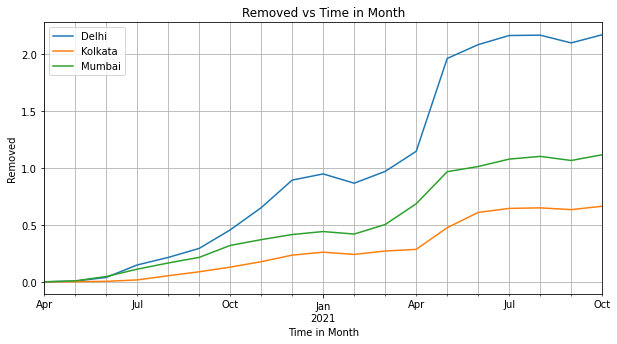

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### The given values of population and area are stored in dictionaries
population = {"Delhi":20591874, "Mumbai":20667656, "Kolkata":14850000}
area = {"Delhi":1400, "Mumbai":670, "Kolkata":206}

### Reading the dataset and parse the date column
data1 = pd.read_csv('districts (3).csv', parse_dates=['Date'])

### Filter the data only for 'Delhi', 'Kolkata', and 'Mumbai'
data1 = data1[data1['District'].str.contains("Delhi", case=False) | data1['District'].str.contains("Mumbai", case=False) | data1['District'].str.contains("Kolkata", case=False)]

### Taking the data of only important columns
data1 = data1[['Date', 'District', 'Confirmed', 'Recovered', 'Deceased']]

### Add new columns for 'Infected', 'Susceptible', and 'Removed'
data1['Infected'] = (data1['Confirmed'] - data1['Recovered'] - data1['Deceased'])/data1['District'].map(population)
data1['Susceptible'] = (data1['District'].map(population) - data1['Confirmed'])/data1['District'].map(population)
data1['Removed'] = (data1['Recovered'] + data1['Deceased'])/data1['District'].map(population)

### Aggregate (add) the data for each month and for each location
df = data1.groupby([pd.Grouper(key='Date', freq='1M'), 'District']).sum().reset_index()
df['Date'] = df['Date'].dt.to_period('M')

### Reshape the dataframe (data table) so that columns will be for each pair of location and calculated parameter   
# To get in order like Apl, May, Jun
df = df.pivot(index='Date', columns='District')

### Plot graph for calculated parameters ('Infected', 'Susceptible', and 'Removed') vs Time in Months for all locations
for item in ['Infected', 'Susceptible', 'Removed']:
   
    ### Get the data of a calculated parameter
    df1 = df.loc[:, df.columns.get_level_values(0)==item]
    
    ### Rename the multiindexed columns to simple columns
    df1.columns = ['Delhi', 'Kolkata', 'Mumbai']
    
    ### Plot the graph for a calculated parameter
    df1.plot(figsize=(10, 5)) 
    plt.title('{} vs Time in Month'.format(item))
    plt.xlabel('Time in Month')
    plt.ylabel(item)
    
    plt.grid(which='both')
    plt.show()

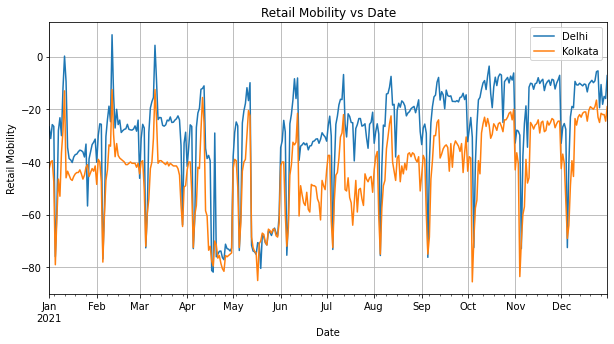

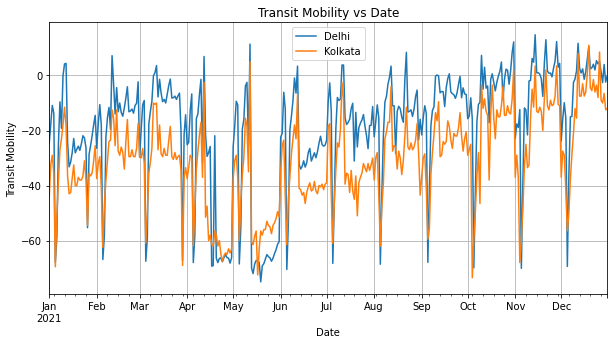


For Retail Mobility of Delhi:
IQR = 18.500 and Mean = -28.977


For Retail Mobility of Mumbai:
IQR = 19.000 and Mean = -43.695


For grocery_and_pharmacy_percent_change_from_baseline of Delhi:
IQR = 25.300 and Mean = 7.866


For grocery_and_pharmacy_percent_change_from_baseline of Mumbai:
IQR = 27.000 and Mean = 7.474


For Transit Mobility of Delhi:
IQR = 22.100 and Mean = -19.121


For Transit Mobility of Mumbai:
IQR = 22.000 and Mean = -30.888



In [82]:
import pandas as pd
import matplotlib.pyplot as plt

col = ['sub_region_2', 'date', 'retail_and_recreation_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline']
data2 = pd.read_csv("2021_IN_Region_Mobility_Report.csv", usecols=col, parse_dates=['date'])
data2 = data2[data2['sub_region_2'].str.contains("Delhi", case=False) | data2['sub_region_2'].str.contains("Mumbai", case=False)]
data2.loc[data2['sub_region_2'].str.contains("Delhi", case=False), 'sub_region_2'] = 'Delhi'
data2.loc[data2['sub_region_2'].str.contains("Mumbai", case=False), 'sub_region_2'] = "Mumbai"
col_dict = {'sub_region_2':'Location', 'date':'Date', 'retail_and_recreation_percent_change_from_baseline':'Retail Mobility', 'transit_stations_percent_change_from_baseline':'Transit Mobility'}
data2.rename(columns=col_dict, inplace = True)
df = data2.groupby([pd.Grouper(key='Date'), 'Location']).mean().reset_index()
df = df.pivot(index='Date', columns='Location')

for item in ['Retail Mobility', 'Transit Mobility']:
   
    ### Get the data of a calculated parameter
    df1 = df.loc[:, df.columns.get_level_values(0)==item]
    
    ### Rename the multiindexed columns to simple columns
    df1.columns = ['Delhi', 'Kolkata']
    
    ### Plot the graph for a given parameter
    df1.plot(figsize=(10, 5)) 
    plt.title('{} vs Date'.format(item)) 
    plt.xlabel('Date') 
    plt.ylabel(item)

    plt.grid()
    plt.show()
    

for col in df.columns:
    print("\nFor {} of {}:".format(col[0], col[1]))
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[col].mean()
    print("IQR = {:.3f} and Mean = {:.3f}\n".format(IQR, mean))

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


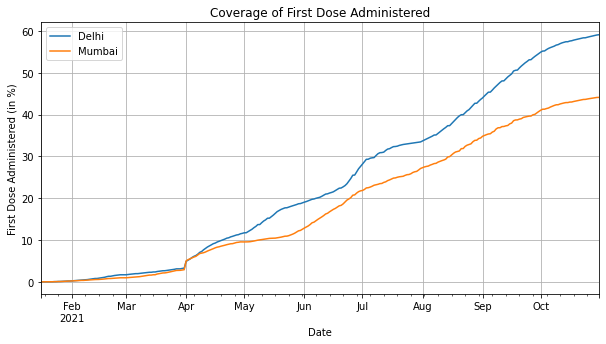

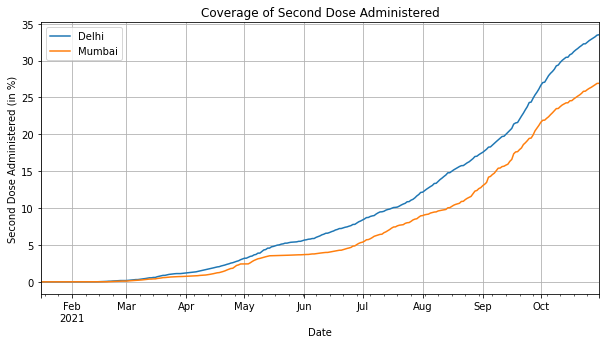


Correlation with First Dose Coverage of Delhi
Sessions_Delhi    0.831128
Sites _Delhi      0.634303
dtype: float64

Correlation with First Dose Coverage of Mumbai
Sessions_Mumbai    0.80905
Sites _Mumbai      0.51899
dtype: float64
State with highest first dose vaccination coverage is Andaman and Nicobar Islands with a coverage of 0.0


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

### The given values of population and area are stored in dictionaries
population = {"Delhi":20591874, "Mumbai":20667656, "Kolkata":14850000}
area = {"Delhi":1400, "Mumbai":670, "Kolkata":206}

### Read the dataset (columns (header name) will take from 1st and 2nd rows)
data3 = pd.read_csv("cowin_vaccine_data_districtwise.csv", header=[0,1], low_memory=False)

### Filter the data only for 'Delhi' and 'Mumbai'
df = data3[data3[('District', 'Unnamed: 5_level_1')].str.contains("Delhi", case=False) | data3[('District', 'Unnamed: 5_level_1')].str.contains("Mumbai", case=False)]

### Replace the respective location values with 'Delhi' and 'Mumbai'
df.loc[df[('District', 'Unnamed: 5_level_1')].str.contains("Delhi", case=False), ('District', 'Unnamed: 5_level_1')] = "Delhi"
df.loc[df[('District', 'Unnamed: 5_level_1')].str.contains("Mumbai", case=False), ('District', 'Unnamed: 5_level_1')] = "Mumbai"

### List of some columns not required for 1st and 2nd part of questions
drop_col = [('S No', 'Unnamed: 0_level_1'), ('State_Code', 'Unnamed: 1_level_1'), ('State', 'Unnamed: 2_level_1'), ('District_Key', 'Unnamed: 3_level_1'), ('Cowin Key', 'Unnamed: 4_level_1')]

### Remove the listed columns
df.drop(drop_col, axis=1, inplace=True)

### Aggregate (add) the data for each location
df = df.groupby([('District', 'Unnamed: 5_level_1')]).sum().reset_index()


### Rotate (Transpose) the dataframe
df = df.T


### Rename the multi-indexed columns to simple columns
df.columns = ['Delhi', 'Mumbai']

### Take the dataframe after 2nd row and reset the index
df = df.iloc[1: , :].reset_index()


### Filter the data for 'Sites', 'Sessions', 'First Dose Administered', and 'Second Dose Administered'
df = df[df['level_1'].str.contains("Sites", case=False) | df['level_1'].str.contains("Sessions", case=False) | df['level_1'].str.contains("First Dose Administered", case=False) | df['level_1'].str.contains("Second Dose Administered", case=False)]


### Group the dataframe based on 'Sites', 'Sessions', 'First Dose Administered', and 'Second Dose Administered'
df1 = df.groupby(['level_1'])

### Crete empty dataframe
newdf = pd.DataFrame()

### Iterate for each dataframe in the group (ie., for 'Sites', 'Sessions', 'First Dose Administered', and 'Second Dose Administered')
for name, group in df1:
    ### Calculate the parameters given in the question
    ### Parameter calculation for  'Sites' and 'Sessions' (added to new dataframe)
    if (name == 'Sites ') or (name == 'Sessions'):
        newdf['{}_Delhi'.format(name)] = list(group['Delhi']/area['Delhi'])
        newdf['{}_Mumbai'.format(name)] = list(group['Mumbai']/area['Mumbai'])
    else:
        ### Parameter calculation for 'First Dose' only (added to new dataframe)
        if 'First' in name:
            newdf['First_Dose_Delhi'] = list((group['Delhi']*100)/population['Delhi'])
            newdf['First_Dose_Mumbai'] = list((group['Mumbai']*100)/population['Mumbai'])
        
        ### Parameter calculation for 'First Dose' and 'Second Dose' only
        group['Delhi'] = list((group['Delhi']*100)/population['Delhi'])
        group['Mumbai'] = list((group['Mumbai']*100)/population['Mumbai'])
        
        ### Changing date string value to Date format of 'level_0' column (actually a date column)
        group['level_0'] = pd.to_datetime(group['level_0'], format='%d-%m-%Y')
       
        ### Set it as index
        group.set_index('level_0', inplace=True)
       
        ### Plot the graph for 'First Dose' and 'Second Dose' coverage
        group.plot(figsize=(10, 5))
        plt.title('Coverage of {}'.format(name)) 
        plt.xlabel('Date') 
        plt.ylabel("{} (in %)".format(name))
        ### Save the graph
        plt.grid()
        plt.show()

        
        
### Find the correlation with 'First_Dose' coverage using the new dataframe (for Delhi)
corrD = newdf[['Sessions_Delhi', 'Sites _Delhi']].corrwith(newdf['First_Dose_Delhi'], method='pearson')
print("\nCorrelation with First Dose Coverage of Delhi")
print(corrD)

### Find the correlation with 'First_Dose' coverage using the new dataframe (for Mumbai)
corrM = newdf[['Sessions_Mumbai', 'Sites _Mumbai']].corrwith(newdf['First_Dose_Mumbai'], method='pearson')
print("\nCorrelation with First Dose Coverage of Mumbai")
print(corrM)

### Rotate (Transpose) the dataframe (original data)
newdata = data3.T.reset_index()

### Filter the First Dose data from original data
newdata =  newdata[newdata['level_1'].str.contains("First Dose Administered", case=False)].append(newdata.iloc[2]).drop(columns=['level_1'])

### Replace the columns name (lebel) using the last row
newdata.columns = newdata.iloc[-1]

### delete the last row
newdata.drop(newdata.index[-1], inplace=True)

### Changing date string value to Date format of 'State' column (actually a date column)
newdata['State'] = pd.to_datetime(newdata['State'], format='%d-%m-%Y')

### Set it as index
newdata.set_index('State', inplace=True)

### Aggregate (add) the data for each States
newdata = newdata.groupby(level=0,axis=1).sum()

ndcl = list(newdata.columns)
ndcsl = []
for x in ndcl:
    ndcsl.append(newdata[x].sum())

nddic=dict(zip(ndcl,ndcsl))
hs=max(nddic, key=nddic.get)

print('State with highest first dose vaccination coverage is',hs, 'with a coverage of', nddic[hs])